# Boston Airbnb Open Data Project


Prepared by: Nesma Silman

### 1.Context:
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

### 2.Content:
The following Airbnb activity is included in this Boston dataset day

* Listings: including full descriptions and average review score
* Reviews: including unique id for each reviewer and detailed comments
* Calendar: including listing id and the price and availability for that day

By exploring this dataset, I'll be looking for answers for the below 3 questions:

1- Extract the listings with the highest # of reviews (top 10). Which one got the highest % of positive reviews?

2- What are the top 3 most frequent neighbourhoods or zipcodes in Boston? (zipcodes with highest number of listings).

3- How the price correlates to the property_type? What types are the most expensive?

### 3.Data Cleaning & Exploration

In [1]:
# Let's start by importing our libraries

import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used to loading CSV data
import seaborn as sns #used for plotting data 

In [2]:
# Suppress warning messages

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Open the zip folder and check the files

import zipfile

z = zipfile.ZipFile('archive (3).zip')

print (z.namelist())

['calendar.csv', 'listings.csv', 'reviews.csv']


In [4]:
# Read the datasets

df_calendar= pd.read_csv(z.open('calendar.csv'))
df_listings= pd.read_csv(z.open('listings.csv'))
df_reviews= pd.read_csv(z.open('reviews.csv'))

In [5]:
df_calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [6]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [7]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [8]:
print("The shape of the calendar is {}".format(df_calendar.shape))
print("The shape of the listings is {}".format(df_listings.shape))
print("The shape of the reviews is {}".format(df_reviews.shape))

The shape of the calendar is (1308890, 4)
The shape of the listings is (3585, 95)
The shape of the reviews is (68275, 6)


Let's check the info for all datasets.

In [9]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [10]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


By taking a look at the .info method for the 3 datasets, it seems that listings dataset is the major one with all important information. We can merge the other 2 datasets to this one and then take a deeper look at the details. We have a common column in the 3 datasets which is "listing_id". I will use it to do the merge.

In [12]:
df_main= df_listings.join(df_calendar, how='left', on= 'id', rsuffix='_cal')
df_main.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_cal
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,moderate,f,f,1,NaN,NaN,NaN,NaN,NaN


Next, I want to join the "reviews" dataset with them. But first, let's see if this data contains multiple rows for each listing to include each review separatey, or each listing has only 1 review. 

In [13]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


Apparently, listings have multiple rows. Every row contains a separate review with its details. Accordingly, we can't join this dataset with the other 2 at the moment. We need to analyse the data and aggregate it to have one row per listing, and then merge with the other main dataset.

Let's start with the df_reviews dataset

In [13]:
df_reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

We have a small # of missing values in the comments column. I believe we can drop them because these comments are the reviews we are trying to analyze, we can't impute them.

In [14]:
df_reviews1=df_reviews.dropna(axis=0)
df_reviews1.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Now let's analyze each review and classify it under 3 main categories [positive, neutral, negative]. We can use ready-made libraries for the sentiment analysis task

In [15]:
import inflect
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import wordnet as wn

In [16]:
p = inflect.engine()
def convert_number(text):
    """Takes in a text, searches for numbers in digit format, and transforms it into letters (text format)"""
    
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

In [17]:
english_stops = stopwords.words('english')
#add punctuation to stopwords
english_stops += list(string.punctuation)

In [18]:
def text_processing(row):
    """Takes in a reviews row, makes all pre-processing steps to prepare for sentiment analysis"""
    
    row['comments'] = row['comments'].lower()               ### convert text to lower case
    row['comments'] = re.sub(r"\s+[a-zA-Z]\s+", " ", row['comments'])   
    clean = re.compile('<.*?>')
    row['comments'] = re.sub(clean, '', row['comments'])
    row['comments'] = re.sub(r"\s+"," ", row['comments'], flags = re.I)
    row['comments'] = re.sub(r'^https?:\/\/.*[\r\n]*', '', row['comments'], flags=re.MULTILINE)
    row['comments'] = re.sub(r"\W", " ", row['comments'], flags=re.I)  ### remove all non-word characters
    row['comments'] = convert_number(row['comments'])       ### convert number to text
  
    review_words = word_tokenize(row['comments'])        ### get words from text
    review_words_no_stop = [item for item in review_words if item not in english_stops] ### removes stopwords & punctuation
    wordnet_lemmatizer = WordNetLemmatizer()
    words_lemmatization = [wordnet_lemmatizer.lemmatize(item) for item in review_words_no_stop] ### lemmatize words
    words_in_english = [item for item in words_lemmatization if len(wn.synsets(item)) != 0]
    
    unique_words = list(set(words_in_english))      ### removes duplicated words
    
    row['comments'] = " ".join(unique_words)             ### Concatenate all words
    return row['comments']

In [19]:
# Apply function to the "comments" column

df_reviews1['comments'] = df_reviews1.apply(lambda row: text_processing(row), axis=1)
df_reviews1.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,last away nice place room minute cool arrival ...


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Use vader for sentiment analysis
vader = SentimentIntensityAnalyzer()

In [21]:
# Create a new column for the polarity_scores values retrieved by vader

df_reviews1['Scores'] = df_reviews1['comments'].apply(lambda review: vader.polarity_scores(review))
df_reviews1.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments,Scores
0,1178162,4724140,2013-05-21,4298113,Olivier,last away nice place room minute cool arrival ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."


In [22]:
# Create a new column to separate the "compound" scores

df_reviews1['compound'] = df_reviews1['Scores'].apply(lambda x: x['compound'])
df_reviews1.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments,Scores,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,last away nice place room minute cool arrival ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.9387


In [23]:
def polarity_score(compound):
    """Takes in the compound score, and returns the category [positive, neutral, negative] based on the 
        commonly used threshold to interpret the compound score"""
    
    if compound > 0.05: # 
        return "positive"
    elif compound < -0.05:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [25]:
# Apply function to classify reviews

df_reviews1['sentiment'] = df_reviews1['compound'].apply(lambda val: polarity_score(val))
df_reviews1.drop(['Scores', 'compound'], axis=1, inplace=True) # drop unnecessary columns
df_reviews1.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,1178162,4724140,2013-05-21,4298113,Olivier,last away nice place room minute cool arrival ...,positive


In [26]:
# Pivot the data per "listing_id" to get the number of reviews per each category

df_reviews2=df_reviews1.pivot_table(index= 'listing_id', columns='sentiment', aggfunc='count')['comments']
df_reviews2.head(1)

sentiment,negative,neutral,positive
listing_id,,,
3353,NaN,NaN,34.0


In [27]:
# Create a new summary column to calculate the total # of reviews

df_reviews2['total_reviews']=df_reviews2.sum(axis=1, skipna=True)

# Sort descendingly to get the highest # of reviews at the top

df_reviews2.sort_values(by='total_reviews', ascending=False,inplace=True)

df_reviews2.head(2)

sentiment,negative,neutral,positive,total_reviews
listing_id,,,,
66288,27.0,16.0,359.0,402.0
1497879,9.0,8.0,303.0,320.0


In [28]:
# Create a new % columns to display the % of each category

df_reviews2['neg%']= round(df_reviews2['negative']*100/df_reviews2['total_reviews'],2)
df_reviews2['net%']= round(df_reviews2['neutral']*100/df_reviews2['total_reviews'],2)
df_reviews2['pos%']= round(df_reviews2['positive']*100/df_reviews2['total_reviews'],2)
df_reviews2.drop(['negative', 'neutral','positive'], axis=1, inplace=True) # drop unnecessary columns
df_reviews2.head(2)

sentiment,total_reviews,neg%,net%,pos%
listing_id,,,,
66288,402.0,6.72,3.98,89.30
1497879,320.0,2.81,2.50,94.69


Now, we are ready to answer our first question. Among the listings with the highest # of reviews (top 10). Which one got the highest % of positive reviews? let's find the answer

In [29]:
# Top 10 frequent listings 

top10=df_reviews2.iloc[:10,:]
top10

sentiment,total_reviews,neg%,net%,pos%
listing_id,,,,
66288,402.0,6.72,3.98,89.30
1497879,320.0,2.81,2.50,94.69
414419,312.0,0.96,4.81,94.23
31796,290.0,2.76,7.59,89.66
815639,281.0,1.42,1.42,97.15
916123,281.0,2.14,1.78,96.09
1136972,280.0,1.79,2.50,95.71
20000,271.0,2.95,4.43,92.62
1695275,251.0,6.37,4.38,89.24


In [108]:
# listing_id with the highest % positive reviews from the top 10 

print("The owner of listing_id {} got the highest % of positive reviews {}% among the top 10 "
      "frequent reviews. Great Job!".format(top10['pos%'].idxmax(), top10['pos%'].max()))

The owner of listing_id 815639 got the highest % of positive reviews 97.15% among the top 10 frequent reviews. Great Job!


The owner of this listing must be doing a great job to maintain such a big % of postive reviews

Let's visualize reviews for the listings with highest # of reviews

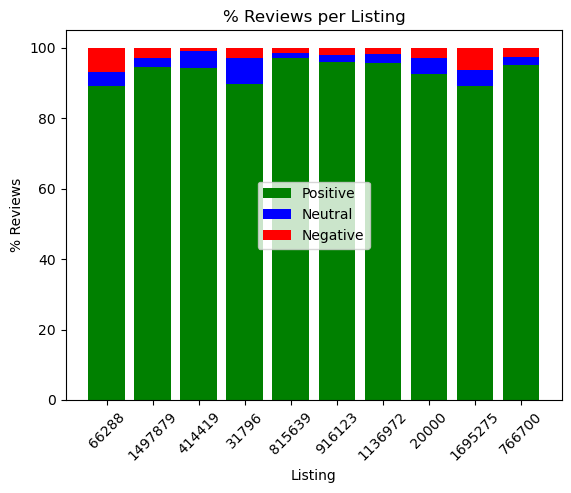

In [38]:
lst=[str(val) for val in top10.index]
plt.bar(x=lst, height=top10['pos%'],color='g')
plt.bar(x=lst, height=top10['net%'],bottom=top10['pos%'],color='b')
plt.bar(x=lst, height=top10['neg%'],bottom=top10['pos%']+top10['net%'],color='r')
plt.xlabel("Listing")
plt.ylabel("% Reviews")
plt.legend(['Positive','Neutral','Negative'], loc=10)
plt.title("% Reviews per Listing")
plt.xticks(rotation=45);

Now, let's merge the reviews to our main dataset

In [39]:
df_main2= df_main.join(df_reviews2, how='left', on= 'id', rsuffix='_rev')
df_main2.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_cal,total_reviews,neg%,net%,pos%
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,1,1.3,NaN,NaN,NaN,NaN,36.0,2.78,2.78,94.44


In [40]:
# Take a look at our columns with missing data

nulls=df_main2.isna().sum()
nulls[nulls!=0]

summary                          143
space                           1057
neighborhood_overview           1415
notes                           1975
transit                         1290
access                          1489
interaction                     1554
house_rules                     1192
thumbnail_url                    599
medium_url                       599
xl_picture_url                   599
host_location                     11
host_about                      1309
host_response_time               471
host_response_rate               471
host_acceptance_rate             471
host_neighbourhood               339
neighbourhood                    543
neighbourhood_group_cleansed    3585
city                               2
zipcode                           38
market                            14
property_type                      3
bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
w

We have alot of missing data. I'm only interested in specific columns that could help me answer my questions. So, I'm going to handle these columns only.

First, let's check the unique cities in our dataset to ensure they all belong to Boston city

In [45]:
df_main2['city'].value_counts()

city
Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Dorchester                     15
Brighton                       15
Charlestown                    15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
ALLSTON                         2
South Boston                    2
Jamaica Plain, Boston           2
Hyde Park                       2
Jamaica Plain                   2
Boston, Massachusetts, US       2
Boston                          1
Roslindale, Boston              1
dorchester, boston              1
Milton                          1
Jamaica Plain (Boston)          1
Newton                          1
波士顿                             1
Jamaica Plain, MA               1
Watertown

I can see other cities' names. By googling, I found that some names from the dataset are neighbourhoods located in Boston. Let's see an example below.

In [41]:
df_main2[df_main2['city'].str.contains(r'\bmilton\b', case=False, na=False)].T[0:60]

,2762
id,3839678
listing_url,https://www.airbnb.com/rooms/3839678
scrape_id,20160906204935
last_scraped,2016-09-07
name,Bedroom close to Boston
summary,We live on the Milton side of the Neponset Riv...
space,"This was the bedroom of our son, now in his la..."
description,We live on the Milton side of the Neponset Riv...
experiences_offered,none
neighborhood_overview,"Because Milton is a great town to raise kids, ..."


In the above example, We can see that the name "Boston" is mentioned in the "Market" column instead of the "City" column. To ensure that we are selecting the correct data, I'm going to select only the rows with the name "Boston" in any of the columns.

In [42]:
df_main3=df_main2[df_main2.applymap(lambda x: isinstance(x, str) and 'boston' in x.lower()).any(axis=1)]

df_main3.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,calculated_host_listings_count,reviews_per_month,listing_id,date,available,price_cal,total_reviews,neg%,net%,pos%
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
len(df_main3)

3585

Now I'm interested to know what are the top 3 most frequent neighbourhoods or zipcodes in Boston? (zipcodes with highest number of listings). Let's explore the neighbourhood column

In [45]:
neighbourhood=df_main3['neighbourhood'].value_counts()
neighbourhood

neighbourhood
Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: count, dtype: int64

Let's visualize this data

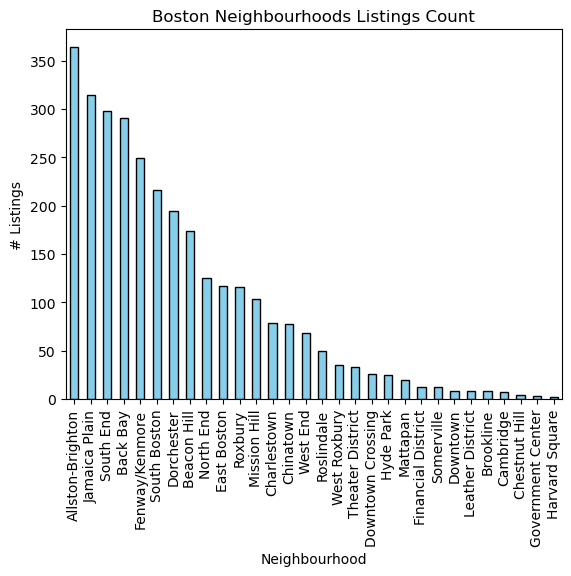

In [46]:
neighbourhood.plot(kind='bar', color='skyblue', edgecolor='black')
# Adding titles and labels
plt.title('Boston Neighbourhoods Listings Count')
plt.xlabel('Neighbourhood')
plt.ylabel('# Listings');

In [47]:
# Check % of missing values in neighbourhood
df_main3['neighbourhood'].isna().sum()/len(df_main3) # check missing values %

0.1514644351464435

There are 15% of the neighbourhood data missing. Let's see if we can rely on the smart_location column

In [48]:
df_main3['smart_location'].unique()

array(['Boston, MA', 'Roslindale, MA', 'Roslindale, Boston, MA',
       'Jamaica Plain, MA', 'Brookline, MA', 'Jamaica Plain, Boston, MA',
       'Jamaica Plain (Boston), MA', 'Roxbury Crossing, MA',
       'Jamaica Plain , MA', 'Jamaica Plain, MA, MA',
       'Boston (Jamaica Plain), MA', 'Jamaica plain , MA',
       'ROXBURY CROSSING, MA', 'Mission Hill, Boston, MA', 'boston, MA',
       '波士顿, MA', 'Boston, Massachusetts, US, MA',
       'South End, Boston, MA', 'Cambridge, MA', 'East Boston, MA',
       'east Boston , MA', 'Charlestown, MA', 'Boston (Charlestown), MA',
       'Somerville, MA', 'Watertown, MA', 'Brighton, MA', 'Brighton , MA',
       'Boston , MA', 'MA', 'West Roxbury, MA', 'Newton, MA',
       'Hyde Park, MA', 'Mattapan, MA', 'Milton, MA', 'Dorchester, MA',
       'dorchester, boston , MA', 'South Boston, MA', 'Allston, MA',
       'ALLSTON, MA'], dtype=object)

I can see values like 'Brighton, MA' and 'Brighton , MA'. The only difference is that there is a space after the name Brighton in the second entry. It seems that values are entered by hand, not using a dropdown menu, so they are not unified. I believe we can't rely on this column. Let's see the zipcode data.

In [49]:
zc=df_main3['zipcode'].unique()
zc

array(['02131', nan, '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02108 02111', '02472', '02122',
       '02446', '02135', '02134', '02445', '02132', '02467', '02136',
       '02186', '02169', '02127', '02134-1704', '02163', '02138', '02139',
       '02141', '02143'], dtype=object)

The data seems consistent. Let's ensure they all have the same length.

In [50]:
print([len(str(z)) for z in zc])

[5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 5, 5, 5, 5, 5]


All lengths are 5 except for 3 values: the nan, and 2 values that seem to have the zip code in the first part of the entry. Let's clean this column and use it to answer our question. But let's check the nan value count first

In [51]:
df_main3['zipcode'].isna().sum()

38

That's a small # of missing values. Let's rely on this column to answer our question

In [57]:
# Handle faulty values

[z for z in zc if len(str(z))!=5]

[nan, '02108 02111', '02134-1704']

In [58]:
# For the value of '02134-1704', the second part is not a zipcode since it doesn't begin with 02 and has a length of 4. We can
# be confident to use the first part only as the correct zip code

df_main3.loc[df_main3['zipcode'] == '02134-1704', 'zipcode'] = df_main3.loc[
                                    df_main3['zipcode'] == '02134-1704', 'zipcode'].str.split('-').str[0]

For the second value '02108 02111', I'm not sure which zip code is correct, is it the first or second part? Let's explore both codes in our data

In [60]:
len(df_main3.loc[df_main3['zipcode'] == '02108'])

72

In [61]:
len(df_main3.loc[df_main3['zipcode'] == '02111'])

99

Both codes exist. Let's see their neighbourhoods

In [62]:
df_main3.loc[df_main3['zipcode'] == '02108']['neighbourhood']

735             North End
739             North End
755             North End
1829          Beacon Hill
1831          Beacon Hill
              ...        
2159    Downtown Crossing
2166    Downtown Crossing
2178          Beacon Hill
2189          Beacon Hill
2190    Downtown Crossing
Name: neighbourhood, Length: 72, dtype: object

In [63]:
df_main3.loc[df_main3['zipcode'] == '02111']['neighbourhood']

550      Leather District
551      Leather District
552      Leather District
553      Leather District
554      Leather District
              ...        
2187    Downtown Crossing
2188            Chinatown
2191    Downtown Crossing
2194            Chinatown
2589                  NaN
Name: neighbourhood, Length: 99, dtype: object

Now let's see the neighbourhood of our incorrect record.

In [64]:
df_main3.loc[df_main3['zipcode'] == '02108 02111']['neighbourhood']

2047    Downtown Crossing
Name: neighbourhood, dtype: object

Both zip codes have this neighbourhood. It might be an intersection of 2 zip codes. Let's write the first one for simplicity.

In [65]:
df_main3.loc[df_main3['zipcode'] == '02108 02111', 'zipcode'] = df_main3.loc[
                                    df_main3['zipcode'] == '02108 02111', 'zipcode'].str.split().str[0]

In [66]:
df_main3['zipcode'].unique()

array(['02131', nan, '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02472', '02122', '02446', '02135',
       '02134', '02445', '02132', '02467', '02136', '02186', '02169',
       '02127', '02163', '02138', '02139', '02141', '02143'], dtype=object)

Finally, let's handle the missing values. Let's see if we can derive information from other columns that have location information

In [67]:
# Retrieve neighbourhood values for records with missing zip codes

nh=df_main3[df_main3['zipcode'].isna()]['neighbourhood']
nh

3                    NaN
94                   NaN
162                  NaN
226                  NaN
494                  NaN
655                  NaN
675            North End
740                  NaN
882                  NaN
948                  NaN
1063           South End
1150                 NaN
1212           South End
1291                 NaN
1385                 NaN
1473                 NaN
1557                 NaN
1601                 NaN
1631                 NaN
1662                 NaN
2033                 NaN
2151                 NaN
2242                 NaN
2298                 NaN
2299      Fenway/Kenmore
2545                 NaN
2550                 NaN
2805                 NaN
2932                 NaN
2963                 NaN
3030                 NaN
3058                 NaN
3117                 NaN
3194                 NaN
3477                 NaN
3529    Allston-Brighton
3557                 NaN
3561                 NaN
Name: neighbourhood, dtype: object

Neighbourhood data is also missing except for a few records. Let's get the zip codes of these few existing records to fill null values in the zip column. But we need to ensure first, does every neighbourhood has a unique zip code?

In [68]:
list(nh.dropna())

['North End', 'South End', 'South End', 'Fenway/Kenmore', 'Allston-Brighton']

In [70]:
# Check zipcodes of the first neighbourhood

df_main3[df_main3['neighbourhood']=='North End']['zipcode']

627     02113
628     02110
629     02113
630     02113
633     02113
        ...  
766     02113
767     02113
768     02113
2059    02110
2148    02110
Name: zipcode, Length: 125, dtype: object

It seems that a single neighbourhood might have more than one zip code. I believe we should ignore records with missing values in the zip code column and analyze the existing data only.

In [71]:
zipcode= df_main3.dropna(subset='zipcode', axis=0)

Now let's see the zipcodes with highest number of units

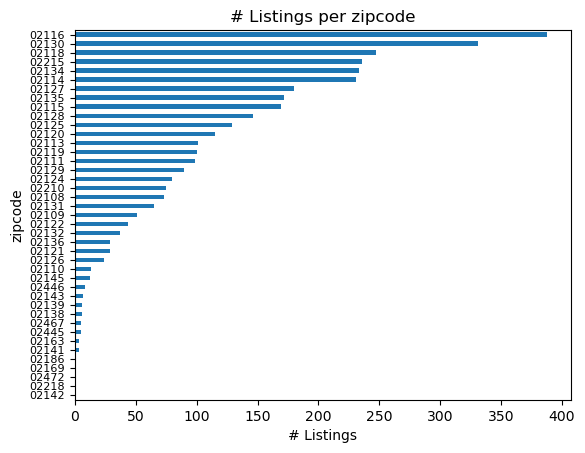

In [73]:
# Visualize all zip codes with their # units
highestzip=zipcode['zipcode'].value_counts().sort_values(ascending=True)
highestzip.plot(kind='barh')

#Adding titles and labels
plt.title('# Listings per zipcode')
plt.xlabel('# Listings')
plt.ylabel('zipcode')
plt.yticks(size=8); 

In [78]:
# Top 3 frequent zipcodes

top3=list(zipcode['zipcode'].value_counts().index)[:3]
top3

['02116', '02130', '02118']

This answers our second question. These 3 zipcodes have the highest # of listings.

Finally, I want to see how the price correlates to the property_type. What types are the most expensive?

In [79]:
p_type=df_main3[['property_type','price']]
p_type.isna().sum()

property_type    3
price            0
dtype: int64

In [80]:
len(p_type)

3585

property_type column has only 3 missing values, while price doesn't have any missing values. Let's drop the 3 values because they won't impact our results since they are a very small % of our data.

In [81]:
p_type.dropna(inplace=True)

In [82]:
p_type.head(1)

,property_type,price
0,House,$250.00


In [83]:
p_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3582 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_type  3582 non-null   object
 1   price          3582 non-null   object
dtypes: object(2)
memory usage: 84.0+ KB


We need to remove the $ from the price column to be able to aggregate it

In [85]:
p_type['price'] = p_type['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Remove $ and commas
p_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3582 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  3582 non-null   object 
 1   price          3582 non-null   float64
dtypes: float64(1), object(1)
memory usage: 84.0+ KB


In [104]:
# Calculate the average price/type
avg_price=p_type.groupby('property_type').agg(['mean','count']).reset_index().sort_values(by=('price', 'mean'), ascending=False)
avg_price

property_type       price      
                           mean count
7        Guesthouse  289.000000     1
2              Boat  268.833333    12
10            Other  229.941176    17
4       Condominium  190.246753   231
12            Villa  189.500000     6
9              Loft  185.410256    39
0         Apartment  181.966692  2612
11        Townhouse  149.037037    54
8             House  131.599644   562
1   Bed & Breakfast  129.365854    41
6      Entire Floor  122.000000     4
5              Dorm   62.500000     2
3         Camper/RV   60.000000     1

Most expensive type is Guesthouse followed by boats, but Guesthouse has 1 entry only, so we can't rely on it as a measurement for standard prices of guesthouses.

This answers our third question.

Let's plot the variability of prices for each type

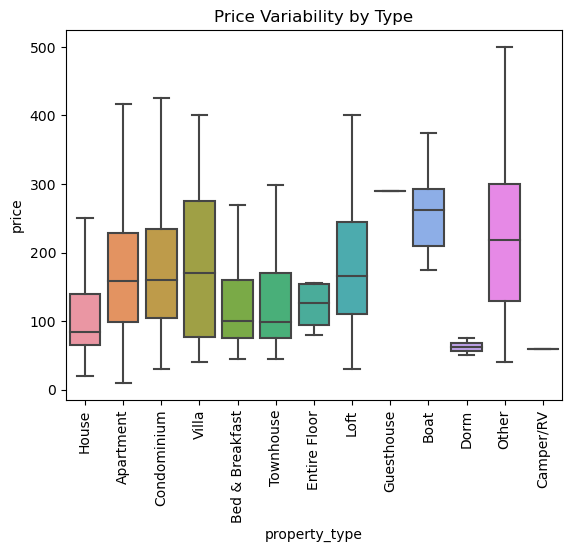

In [107]:
# Box plot
sns.boxplot(x='property_type', y='price', data=p_type, showfliers=False) # showfliers to exclude outliers
plt.xticks(rotation=90)
plt.title('Price Variability by Type');

We notice that there is a huge variability in the prices of "Villa" and "Other" types, while Guesthouses and campers don't have any variability because their count is 1 only.

### 4.Conclusion:

To recap, we had a 3 questions that we were interested to answer using our data as below,

1- Extract the listings with the highest # of reviews (top 10). Which one got the highest % of positive reviews?

***By exploring the data, we found that listing_id 815639 has the highest % of positive reviews (97.15%)***

2- What are the top 3 most frequent neighbourhoods or zipcodes in Boston? (zipcodes with highest number of listings).

***The highest zipcodes were ['02116', '02130', '02118']. We started by exploring the neighbourhood column, but it had around 15% missing values with no other source to impute the missing values, so we considered the zip code column***

3- How the price correlates to the property_type? What types are the most expensive?

***It was found that Guesthouse has the highest average price, but since we only had 1 record with this type, we moved to the next highest type which was "Boat"***

By this, we have come to the end of our analysis.

### Thank you